# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [88]:
# load the data into a pandas DataFrame 'df'
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

# rename the columns to match above to make ckecking for data discrepancies easier
columns = ['A' + str(x) for x in range(1,17,1)]
df.columns=columns

# print out the first 5 rows of df
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [89]:
# check the shape of the df and check the UCI page to make sure df was loaded properly

df.shape

(690, 16)

In [90]:
# check the data types of all the columns
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [91]:
#  look at all columns and rows, there is missing data but isnull().sum() showed none
df.describe(include=[np.object,np.number])

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [94]:
# looks like NaN / missing data is ? instead of NaN
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [0]:
# replace '?' with NaN
df = df.replace({'?': np.NaN})

In [96]:
# get a count of the missing data
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# types of many columns are incorect, need to change A2, A11, A14, A15 from object to float
cols_to_convert = ['A2', 'A11', 'A14', 'A15']

for col in cols_to_convert:
  df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

In [98]:
# check to see if types have been correctly converted to floats
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [0]:
# due to the ambiguous nature of the data I decided to simply use a forward fill to fill all NaN's
df = df.fillna(method='ffill')

In [100]:
# check to make sure NaN's are filled
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

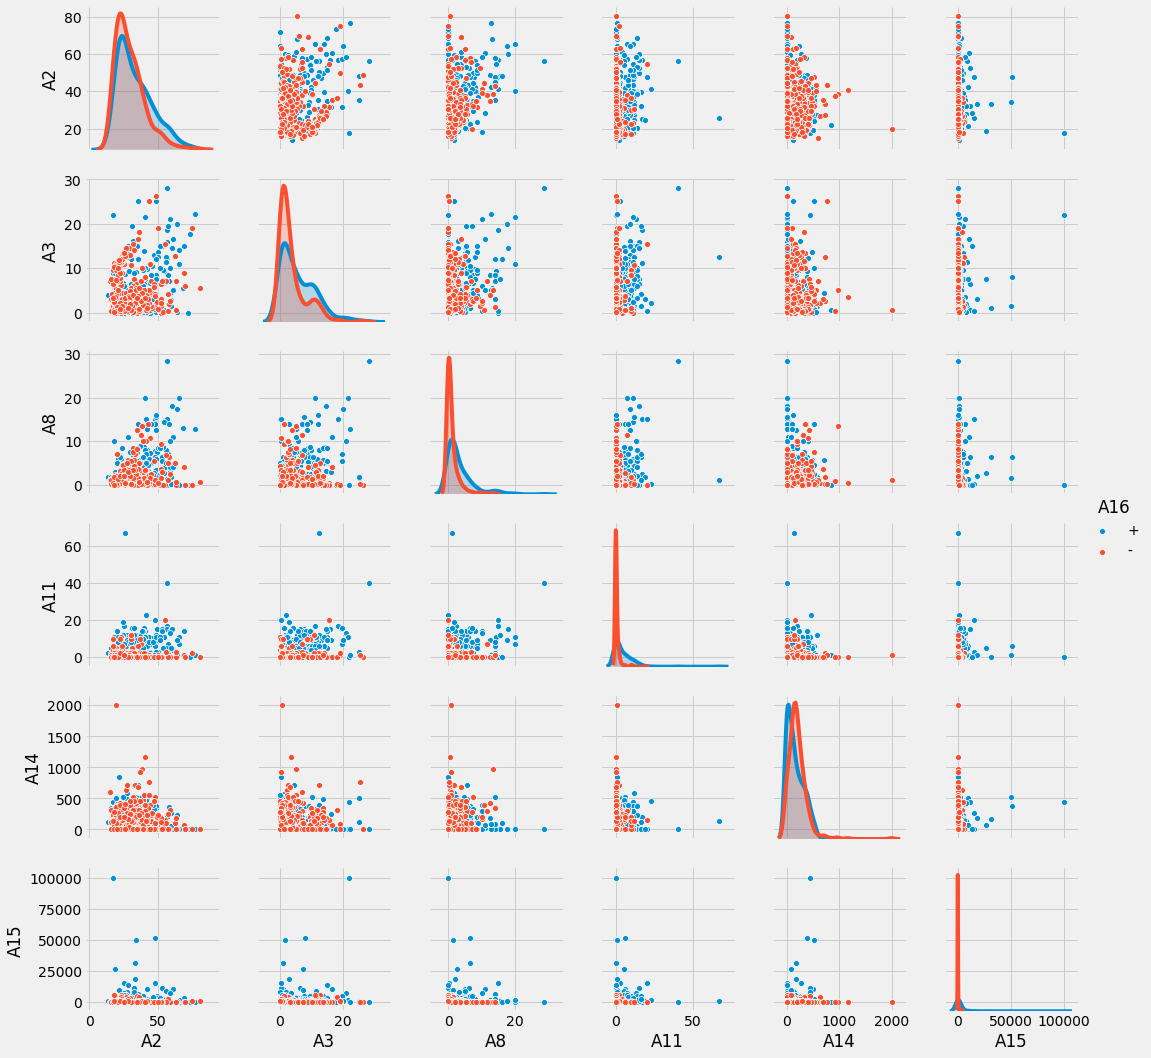

In [102]:
sns.pairplot(df, hue='A16')

In [0]:
# Split df into two df's based on A16 +/- class label
approved = df[df['A16'] == '+']
declined = df[df['A16'] == '-']

In [104]:
# print out values of the new df's to make sure they are correct
print(approved['A16'].value_counts(), declined['A16'].value_counts())

+    307
Name: A16, dtype: int64 -    383
Name: A16, dtype: int64


In [0]:
# assert the len of the 2 new df's when added together = the len of the original df
assert len(df['A16']) == len(approved['A16']) + len(declined['A16'])

In [0]:
# set style to 'five thirty eight'
style.use('fivethirtyeight')

In [0]:
# make a list of the continuous columns
continuous = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

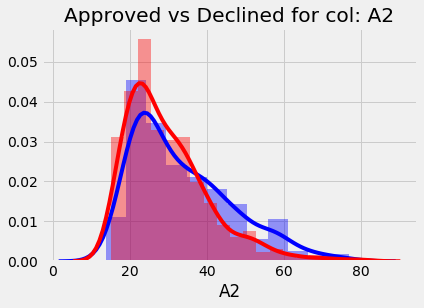

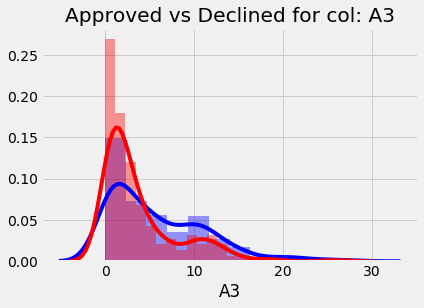

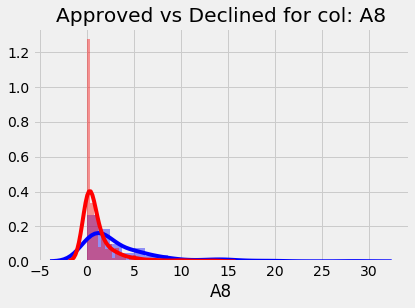

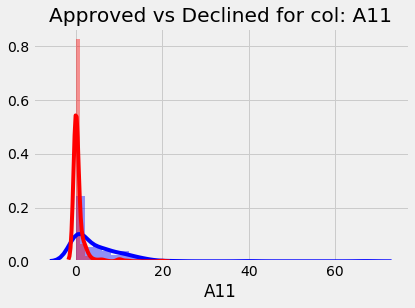

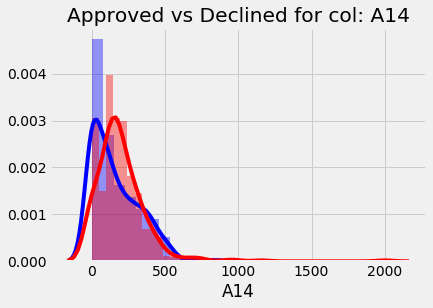

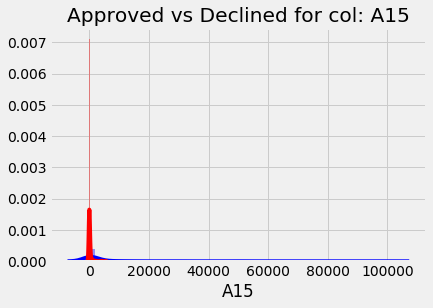

<Figure size 432x288 with 0 Axes>

In [109]:
# loop through the continuous columns and compare approved vs declined
for col in continuous:
  sns.distplot(approved[col], color='blue')
  sns.distplot(declined[col], color='red')
  plt.title(f'Approved vs Declined for col: {col}')
  plt.figure();

In [110]:
# t-test and p-values for approved vs declined for columns A8
stat, pvalue = ttest_ind(approved['A8'], declined['A8'])
print(stat, '||', pvalue)

8.935819983773698 || 3.6710537401601785e-18


In [113]:
# t-test and p-values for approved vs declined for columns A14
stat, pvalue = ttest_ind(approved['A14'], declined['A14'])
print(stat, '||', pvalue)

-2.8172805065288804 || 0.004982145446164413


In [0]:
category_cols = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']

In [0]:
A1_observed = pd.crosstab(df['A1'], df['A16'], margins=True)
A4_observed = pd.crosstab(df['A4'], df['A16'], margins=True)
A5_observed = pd.crosstab(df['A5'], df['A16'], margins=True)
A6_observed = pd.crosstab(df['A6'], df['A16'], margins=True)
A7_observed = pd.crosstab(df['A7'], df['A16'], margins=True)
A9_observed = pd.crosstab(df['A9'], df['A16'], margins=True)
A10_observed = pd.crosstab(df['A10'], df['A16'], margins=True)
A12_observed = pd.crosstab(df['A11'], df['A16'], margins=True)
A13_observed = pd.crosstab(df['A12'], df['A16'], margins=True)


In [134]:
chi2, p, dof, expected = chi2_contingency(A1_observed)
print('A1')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A4_observed)
print('A4')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A5_observed)
print('A5')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A6_observed)
print('A6')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A7_observed)
print('A7')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A9_observed)
print('A9')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A10_observed)
print('A10')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A12_observed)
print('A12')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)

chi2, p, dof, expected = chi2_contingency(A13_observed)
print('A13')
print(f'chi2: {chi2}')
print(f'P-value: {p}')
print(f'DoF: {dof}')
print('-----------'*10)


A1
chi2: 0.6281239499423525
P-value: 0.959887786035873
DoF: 4
--------------------------------------------------------------------------------------------------------------
A4
chi2: 27.381959088907593
P-value: 0.00012278978840772302
DoF: 6
--------------------------------------------------------------------------------------------------------------
A5
chi2: 27.381959088907593
P-value: 0.00012278978840772302
DoF: 6
--------------------------------------------------------------------------------------------------------------
A6
chi2: 101.15724449221702
P-value: 3.2852912098436417e-10
DoF: 28
--------------------------------------------------------------------------------------------------------------
A7
chi2: 47.13464777583941
P-value: 0.00020222834900863142
DoF: 18
--------------------------------------------------------------------------------------------------------------
A9
chi2: 358.10032647163285
P-value: 3.125328283651242e-76
DoF: 4
------------------------------------------------

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*